In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machinelearning/My Saved Schema.csv
/kaggle/input/burnoutcoping/Burnout - burnout1.csv
/kaggle/input/burnoutcoping/Burnout - burnout2.csv
/kaggle/input/burnoutcoping/Burnout - coping.csv
/kaggle/input/progression/Burnout - progression.csv
/kaggle/input/wellness/Burnout - well.csv
/kaggle/input/causes/Burnout - Sheet1.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Motivation

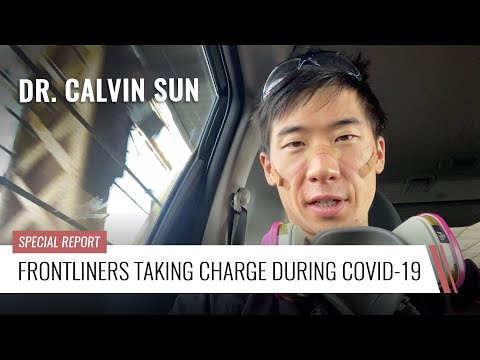

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('fR9Eg7FnsAk', width=800, height=450)

# Objective:

After seeing the toll the Pandemic has had on frontline healthcare workers, I wanted to do an analysis on:


* [Causes](#section-one)
* [Progression](#section-two)
* [Burnout](#section-three)
    - [Survey 1](#subsection-one)
    - [Survey 2](#subsection-two)
* [Coping](#section-four)
* [Suggested/Most Effective Remedies](#section-five)
* [ML](#section-six)
    - [Dataset](#subsection-three)

Data sources:

1. https://www.healthcarefinancenews.com/news/healthcare-workers-experiencing-burnout-stress-due-covid-19-pandemic#:~:text=The%20top%205%20stressors%20that,and%20family%20issues%20and%20responsibilities.
1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7297159/

<a id="section-one"></a>
# Causes

In [4]:
causes = pd.read_csv('../input/causes/Burnout - Sheet1.csv')
causes

,Causes,Count
0,Stress,1040
1,Anxiety,962
2,Frustration,861
3,Overwhelmed,839


In [5]:
import plotly.express as px

fig = px.bar(causes, x='Causes', y='Count')
fig.update_traces(marker_color='navy')
fig.show()

These groups are broad and can be looked into deeper.

<a id="section-two"></a>
# Progression

In [6]:
progression = pd.read_csv('../input/progression/Burnout - progression.csv')
progression

,Progression-changes in sentiment over 3 months (June - Sept),Percent,Count
0,emotional exhaustion,82,917
1,sleep trouble,70,783
2,physical exhaustion,68,760
3,work-related dread,63,704
4,changes in appetite,57,637
5,headache/stomach ache,56,626
6,questioning career path,55,615
7,compassion fatigue,52,581
8,heightened awareness/attention to being exposed,52,581
9,higher exposure to coronavirus,41,447


In [7]:
fig = px.bar(progression, x='Progression-changes in sentiment over 3 months (June - Sept)', y='Count',
             hover_data=['Progression-changes in sentiment over 3 months (June - Sept)', 'Count'], color='Count',
             labels={'count':'Count'}, height=800)
fig.show()

Emotional exhaustion and being too tired are commonly what increase over time.

<a id="section-three"></a>
# Burnout

<a id="subsection-one"></a>
## Survey 1 with 1119 participants.

In [8]:
burnout1 =  pd.read_csv('../input/burnoutcoping/Burnout - burnout1.csv')
burnout1 

,Top Reasons for Burnout,Percentage
0,inadequate emotional support,39
1,uncertainty about return to normal,61
2,heavy/increased workload,49
3,less than recommended 8 hrs of sleep,90
4,less than 4 hrs of sleep,30
5,fear of getting Covid,20
6,long hours/shifts,20
7,general state of the world,20
8,fear of spreading the coronavirus,20
9,family issues and responsibilities,20


In [9]:
fig = px.bar(burnout1, x='Top Reasons for Burnout', y='Percentage ',
             hover_data=['Top Reasons for Burnout', 'Percentage '], color='Percentage ', color_continuous_scale=px.colors.sequential.Reds,
             labels={'percentage':'Percentage '}, height=600)
fig.show()

From this population, when someone is burnt out, leading cause is sleep deprivation. Also, at the time, uncertainty about when things will turn back to normal is not too far behind.

<a id="subsection-two"></a>
## Survey 2 with 657 participants.

And from this point on, all data is from this group of participants.

In [10]:
burnout2 = pd.read_csv('../input/burnoutcoping/Burnout - burnout2.csv')
burnout2

,Contributors to Burnout,Percentage
0,lack of control,70
1,uncertain clinician status,60
2,patient emotional support,59
3,contracting COVID-19,57
4,redeployed outside specialty,55
5,triage/rationing decisions,53
6,contact with COVID-19 patients,52
7,working with symptoms,50
8,patient deaths,50
9,treating healthcare worker with COVID-19,49


In [11]:
fig = px.bar(burnout2, x='Contributors to Burnout', y='Percentage ',
             hover_data=['Contributors to Burnout', 'Percentage '], color='Percentage ', color_continuous_scale=px.colors.sequential.Burg,
             labels={'percentage':'Percentage '}, height=600)
fig.show()

From this population, highest concerns are for family, lack of goverment help leading to feelings of lack of control.

<a id="section-four"></a>
# Coping

In [12]:
coping = pd.read_csv('../input/burnoutcoping/Burnout - coping.csv')
coping

,coping behaviors,percent
0,physical exercise/activity,59
1,talk therapy,26
2,yoga,25
3,faith-based practice/spirituality,23
4,mediation,23
5,virtual support group,16
6,other,16
7,none,14


In [13]:
fig = px.bar(coping, x='coping behaviors', y='percent',
             hover_data=['coping behaviors', 'percent'], color='percent', color_continuous_scale=px.colors.sequential.Mint,
             labels={'percent':'percent'}, height=600)
fig.show()

Not a suprise, but physical exercise/activity helps in relieving stress/anxiety, causes of burnout. Endorphins that come from exercising help in negating negative feelings.

<a id="section-five"></a>
# Suggested/Most Effective Remedies

In [14]:
other_remedies = pd.read_csv('../input/wellness/Burnout - well.csv')
other_remedies

,potential helpful resources,percent
0,none,49
1,self-guided counseling with access to therapist,33
2,individual counseling/therapy,28
3,online clinician support group,24
4,mental wellness video,15
5,online general wellness group,14


In [15]:
fig = px.bar(other_remedies, x='potential helpful resources', y='percent',
             hover_data=['potential helpful resources', 'percent'], color='percent', color_continuous_scale=px.colors.sequential.Purpor,
             labels={'percent':'percent'}, height=600)
fig.show()

Most popular suggested helpful resource was self-guided couseling with access to therapist. So people seem to like the Calm app kind of therapy supplemented with a real person. There is a mix of convenience and necessity of what it takes to unload stress/manage it better.

<a id="section-six"></a>
# ML

<a id="subsection-three"></a>
## Dataset

Now that we have burnout causes and indicators, we can create a dataset that will be used to classify/diagnose health care workers who may be or susceptible to burnout. Given some inputs into the ML system, can provide alarms to hospital management or provide immediate appointment booking with therapist to sound the alarm early before burnout/prevent PTSD.

Data Dictionary:
* Gender: 
    * Male -0
    * Female -1
* Race: 
    * White	-1
    * Asian	-2
    * Black	-3
    * Hawaiian/Pacific Islander	-4
    * American Indian/Native American	-5
    * Other -6
    * More than one race -7
* Ethnicity:
    * Non-Hispanic or Latino -1
    * Hispanic or Latino -2
    * Prefer not to answer -3
* Clinical Role:
    *  Attending physician -1
    *  Resident or fellow -2
    *  Nurse -3
    *  Advanced practice provider -4
    *  Other -5
* Practice Setting
    * Emergency department -1
    * Intensive care unit -2
    * Inpatient (non-ICU): COVID-19 focused -3
    * Inpatient (non-ICU): not COVID-19 focused -4
    * Outpatient: COVID-19 focused -5
    * Outpatient: not COVID-19 focused -6
    * Other -7

(Synthetic data generated using Mockaroo)

In [16]:
df = pd.read_csv('../input/machinelearning/My Saved Schema.csv')
df

,HCW No,Age,Gender,Race,Ethnicity,No Household members including HCW,living with another HCW,clinical role,practice setting,lack of control,...,physical exercise,yoga,faith-based practice,meditation,self-guided counseling with access to therapist,individual counseling/therapy,online clinician support group,mental wellness video,other coping methods,no coping methods
0,1,69,1,2,3.0,4,0,1,5,1,...,0,0,0,1,0,0,1,0,1,1
1,2,59,1,5,2.0,6,1,1,6,1,...,0,1,1,1,0,1,0,1,0,1
2,3,57,1,7,2.0,5,0,4,1,1,...,0,0,0,1,0,0,1,0,1,0
3,4,30,0,6,2.0,3,0,2,7,0,...,0,0,1,0,0,0,0,1,0,1
4,5,39,1,5,1.0,1,0,4,3,0,...,1,0,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,0,1,1.0,5,0,2,5,0,...,1,1,1,0,0,1,1,0,0,0
996,997,64,0,1,2.0,5,0,1,5,1,...,0,0,0,1,1,1,1,1,1,0
997,998,26,0,5,1.0,2,1,3,2,0,...,0,1,0,1,1,0,1,0,0,1
998,999,70,1,1,3.0,1,0,2,7,1,...,1,0,1,0,0,0,1,1,0,1


In [17]:
#Change positive activity to -1 to count against burnout
cols = ['physical exercise',
 'yoga',
 'faith-based practice',
 'meditation',
 'self-guided counseling with access to therapist',
 'individual counseling/therapy',
 'online clinician support group',
 'mental wellness video',
 'other coping methods']
df[cols] = df[cols].replace(1, -1)
df

,HCW No,Age,Gender,Race,Ethnicity,No Household members including HCW,living with another HCW,clinical role,practice setting,lack of control,...,physical exercise,yoga,faith-based practice,meditation,self-guided counseling with access to therapist,individual counseling/therapy,online clinician support group,mental wellness video,other coping methods,no coping methods
0,1,69,1,2,3.0,4,0,1,5,1,...,0,0,0,-1,0,0,-1,0,-1,1
1,2,59,1,5,2.0,6,1,1,6,1,...,0,-1,-1,-1,0,-1,0,-1,0,1
2,3,57,1,7,2.0,5,0,4,1,1,...,0,0,0,-1,0,0,-1,0,-1,0
3,4,30,0,6,2.0,3,0,2,7,0,...,0,0,-1,0,0,0,0,-1,0,1
4,5,39,1,5,1.0,1,0,4,3,0,...,-1,0,0,0,-1,-1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,0,1,1.0,5,0,2,5,0,...,-1,-1,-1,0,0,-1,-1,0,0,0
996,997,64,0,1,2.0,5,0,1,5,1,...,0,0,0,-1,-1,-1,-1,-1,-1,0
997,998,26,0,5,1.0,2,1,3,2,0,...,0,-1,0,-1,-1,0,-1,0,0,1
998,999,70,1,1,3.0,1,0,2,7,1,...,-1,0,-1,0,0,0,-1,-1,0,1


In [18]:
df.isnull().sum()

HCW No                                              0
Age                                                 0
Gender                                              0
Race                                                0
Ethnicity                                          19
No Household members including HCW                  0
living with another HCW                             0
clinical role                                       0
practice setting                                    0
lack of control                                     0
uncertain clinician status                          0
patient emotional support                           0
contracting COVID-19                                0
redeployed outside specialty                        0
triage/rationing decisions                          0
contact with COVID-19 patients                      0
working with symptoms                               0
patient deaths                                      0
treating HCW with COVID-19  

In [19]:
df.fillna(0,inplace=True)

In [20]:
#threshold for burnout based on age, clinical role and how many stress inducers are there cumulatively at the same time accounting for stress relievers. Lower the threshold than higher the cases of burnout. 
def burntout (row):
    if (row['Age'] <= 32) &  (row['No Household members including HCW'] > 2) & (row['clinical role'] >= 1) & (row['practice setting'] <= 2) & (row['lack of control'] + row['uncertain clinician status'] + row['patient emotional support'] + row['contracting COVID-19'] + row['redeployed outside specialty'] + row['triage/rationing decisions'] + row['contact with COVID-19 patients'] + row['working with symptoms'] + row['patient deaths'] + row['treating HCW with COVID-19'] + row['redeployed within speciality'] + row['transmitting COVID-19 to HCW'] + row['transmitting COVID-19 to patients'] + row['sleep disturbances'] + row['clinical hours'] + row['transmitting COVID-19 to family'] + row['health of family/friends'] + row['social distance from family'] + row['childcare/family responsibilities'] + row['personal finance/advanced care'] + row['lack of testing'] + row['lack of PPE'] + row['lack of treatment guidelines'] + row['lack of discharge guidelines'] + row['physical exercise'] + row['yoga'] + row['faith-based practice'] + row['meditation'] + row['self-guided counseling with access to therapist'] + row['individual counseling/therapy'] + row['online clinician support group'] + row['mental wellness video'] + row['other coping methods'] + row['no coping methods'] >6):
        return 1
   
    else:
        return 0

In [21]:
df['burntout'] = df.apply (lambda row: burntout(row), axis=1)
df

,HCW No,Age,Gender,Race,Ethnicity,No Household members including HCW,living with another HCW,clinical role,practice setting,lack of control,...,yoga,faith-based practice,meditation,self-guided counseling with access to therapist,individual counseling/therapy,online clinician support group,mental wellness video,other coping methods,no coping methods,burntout
0,1,69,1,2,3.0,4,0,1,5,1,...,0,0,-1,0,0,-1,0,-1,1,0
1,2,59,1,5,2.0,6,1,1,6,1,...,-1,-1,-1,0,-1,0,-1,0,1,0
2,3,57,1,7,2.0,5,0,4,1,1,...,0,0,-1,0,0,-1,0,-1,0,0
3,4,30,0,6,2.0,3,0,2,7,0,...,0,-1,0,0,0,0,-1,0,1,0
4,5,39,1,5,1.0,1,0,4,3,0,...,0,0,0,-1,-1,-1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,0,1,1.0,5,0,2,5,0,...,-1,-1,0,0,-1,-1,0,0,0,0
996,997,64,0,1,2.0,5,0,1,5,1,...,0,0,-1,-1,-1,-1,-1,-1,0,0
997,998,26,0,5,1.0,2,1,3,2,0,...,-1,0,-1,-1,0,-1,0,0,1,0
998,999,70,1,1,3.0,1,0,2,7,1,...,0,-1,0,0,0,-1,-1,0,1,0


In [22]:
df.burntout.value_counts() #there's class imbalance that needs to be deal with during training time

0    964
1     36
Name: burntout, dtype: int64

### Preparing dataset for training and prediction

In [23]:
#drop HCW No column
df.drop(columns = 'HCW No',inplace=True)

In [24]:
X = df.drop(columns='burntout')
y = df['burntout']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Class Weights to Handle Class Imbalance
Guidance: https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

When handling class imbalance there are two options:
1. Resampling
1. Class Weights

We will work with class weights in this situation because implementation is easier as most model algorithms have it as a parameter. Also, it is easier to explain.

Basically, the least frequent the class is, the higher the weight for loss function. Whenever there is a misclassification, tne higher the error value will be and therefore more update to model coefficients. In the end, the machine will be less prone in misclassifying less represented class. Model's bias would shift to reduce errors in minority class.

In summary:
* Small weights result in a small penalty and a small update to the model coefficients
* Large weights result in a large penalty and a large update to the model coefficients

### Model Training, Prediction and Model Performance (F1-score)
#### Starting with vanilla (equal weights) Logistic Regression model to classify burnout

The f1 score for the testing data: 0.380952380952381


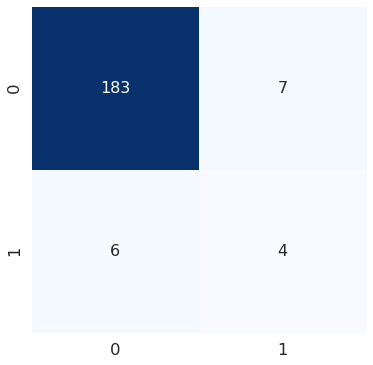

In [26]:
#Fit model to data
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

#Using trained model, predict on X_test
pred_test = lr.predict(X_test)

#Calculating F1-score
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Confusion Matrix
def conf_matrix(y_test, pred_test):
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
    
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size":16}, fmt='g', cmap='Blues', cbar=False)

conf_matrix(y_test, pred_test)

Actual is on the side and Predicted is on the bottom.

Though model predicted the non-burnout predictions very well, the burnout predictions did somewhat well as well. At least there were correct predictions and F1-score is not 0 (though ideal # is 1).

#### Adding weights (class_weight = 'balanced')

The f1 score for the testing data: 0.6896551724137931


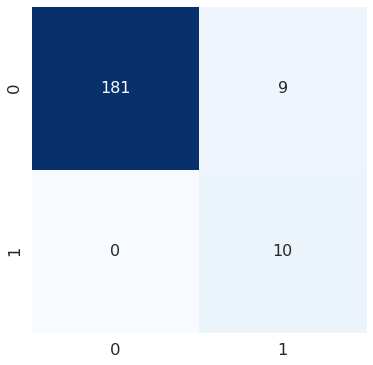

In [27]:
lr_bal = LogisticRegression(solver='newton-cg', class_weight = 'balanced')
lr_bal.fit(X_train, y_train)

#Using trained model, predict on X_test
pred_test = lr_bal.predict(X_test)

#Calculating F1-score
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Confusion Matrix
conf_matrix(y_test, pred_test)

F1-score has improved significantly and there are no false negatives! Though the case of false positives increased slightly, better to have treated someone who was not actually burntout rather than missing someone who was actually burntout.

Let's see if we can improve the model further by manually adjusting the weights to optimize classification even more.

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] class_weight={0: 0.0, 1: 1.0} ...................................
[CV] .................... class_weight={0: 0.0, 1: 1.0}, total=   0.0s
[CV] class_weight={0: 0.0, 1: 1.0} ...................................
[CV] .................... class_weight={0: 0.0, 1: 1.0}, total=   0.0s
[CV] class_weight={0: 0.0, 1: 1.0} ...................................
[CV] .................... class_weight={0: 0.0, 1: 1.0}, total=   0.0s
[CV] class_weight={0: 0.0, 1: 1.0} ...................................
[CV] .................... class_weight={0: 0.0, 1: 1.0}, total=   0.0s
[CV] class_weight={0: 0.0, 1: 1.0} ...................................
[CV] .................... class_weight={0: 0.0, 1: 1.0}, total=   0.0s
[CV] class_weight={0: 0.004974874371859297, 1: 0.9950251256281407} ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}, total=   0.0s
[CV] class_weight={0: 0.004974874371859297, 1: 0.9950251256281407} ...
[CV]  class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}, total=   0.0s
[CV] class_weight={0: 0.004974874371859297, 1: 0.9950251256281407} ...
[CV]  class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}, total=   0.0s
[CV] class_weight={0: 0.004974874371859297, 1: 0.9950251256281407} ...
[CV]  class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}, total=   0.0s
[CV] class_weight={0: 0.004974874371859297, 1: 0.9950251256281407} ...
[CV]  class_weight={0: 0.004974874371859297, 1: 0.9950251256281407}, total=   0.0s
[CV] class_weight={0: 0.009949748743718593, 1: 0.9900502512562814} ...
[CV]  class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}, total=   0.0s
[CV] class_weight={0: 0.009949748743718593, 1: 0.9900502512562814} ...
[CV]  class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}, total= 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   42.6s finished


Text(0.5, 1.0, 'Scoring for different class weights')

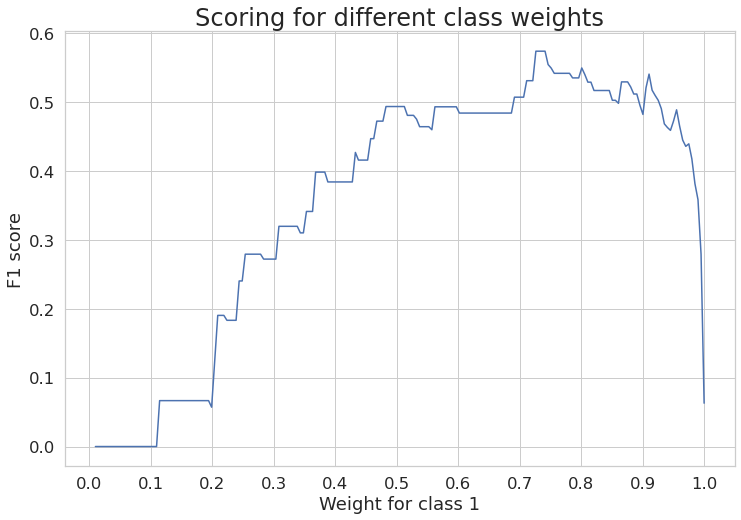

In [28]:
lr_grid = LogisticRegression(solver='newton-cg')

#Setting range for class wts
weights = np.linspace(0.0,0.99,200)

#Creating dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
grid_search = GridSearchCV(estimator  = lr_grid, param_grid = param_grid, cv=StratifiedKFold(), n_jobs=1, scoring = 'f1', verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': grid_search.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

We can see that the F1 score is highest for minority class at about 0.73 class weight. And based on our earlier equation, class 0's class weight would be 1-.73 = 0.27.

Now we can implement these weights on the test data.

The f1 score for the testing data: 0.5


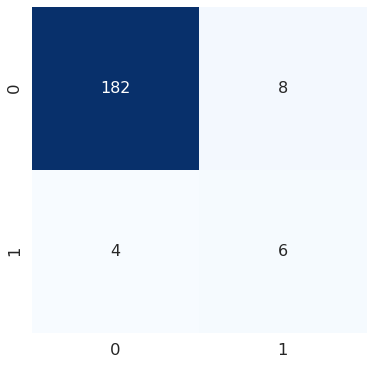

In [29]:
lr_man = LogisticRegression(solver='newton-cg', class_weight={0: 0.2586934673366834, 1: 0.7413065326633166})

lr_man.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr_man.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)

In this situation, grid search did not help improve the minority class' F1 score. So the best setting for class_weight is 'balanced' to get as many predictions close to actual values. 

Also, good to look at the problem's tolerance for error. What are the consequences of not catching all the positive cases/misclassifying a negative case as a positive? Answers to this would help determine weights manually.